In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
from pyvis.network import Network

In [2]:
author = pd.read_csv('../dummy_data/tabla_1.csv')
illness = pd.read_csv('../dummy_data/tabla_2.csv')
links = pd.read_csv('../dummy_data/tabla_3.csv')

In [3]:
all_links = [(links.loc[i, "id_autor"], links.loc[i, "id_enfermedad"]) for i in range(links.shape[0])]
all_links

[(1, 'a'),
 (2, 'a'),
 (3, 'a'),
 (4, 'c'),
 (5, 'c'),
 (7, 'e'),
 (7, 'e'),
 (7, 'e'),
 (4, 'b'),
 (6, 'd'),
 (6, 'd'),
 (1, 'e'),
 (1, 'f'),
 (2, 'c'),
 (2, 'f'),
 (3, 'c'),
 (3, 'e')]

In [16]:
g = nx.Graph()

for i in author["id"]:
    g.add_node(i, bipartite=0)
for j in illness["id"]:
    g.add_node(j, bipartite=0)

# g.add_nodes_from(list(author['id'].values), bipartite=0)
# g.add_nodes_from(list(illness['id'].values), bipartite=1)
g.add_edges_from(
    [(links.loc[i, "id_autor"], links.loc[i, "id_enfermedad"]) for i in range(links.shape[0])]
)


nx.degree(g)
# for n in nx.nodes(g):
#     print(n)
nx.edges(g)

EdgeView([(1, 'a'), (1, 'e'), (1, 'f'), (2, 'a'), (2, 'c'), (2, 'f'), (3, 'a'), (3, 'c'), (3, 'e'), (4, 'c'), (4, 'b'), (5, 'c'), (6, 'd'), (7, 'e')])

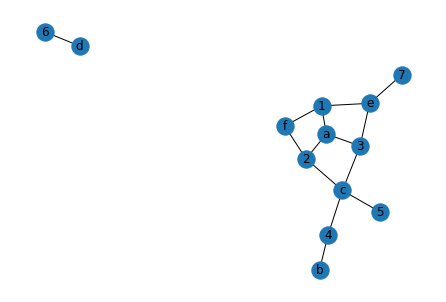

In [17]:
nx.draw(g, with_labels=True)

In [21]:
nt = Network('500px', '500px')
nt.from_nx(g)
nt.show("dummy_graph.html")